# Simple neural network model to predict quadratic function 

Let's use quadratic function to create ideal dataset (without noise). Design a simple neural network model to predict test dataset  $$f(x) = ax^2 + bx + c$$, where `a=8, b=4` and `c=-3` are constants.

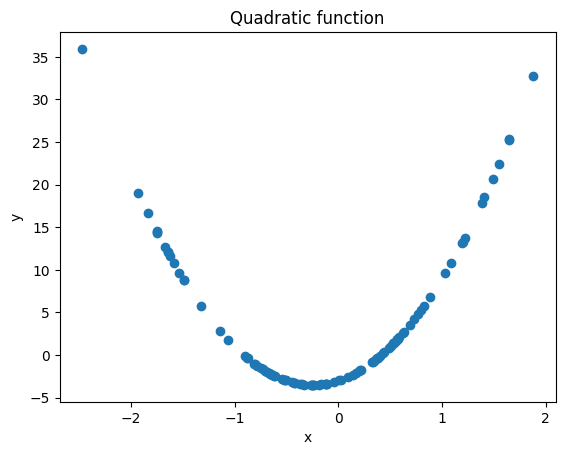

Epoch 0, Loss: 87.6821
Epoch 100, Loss: 8.1981
Epoch 200, Loss: 0.6495
Epoch 300, Loss: 0.1382
Epoch 400, Loss: 0.0474
Epoch 500, Loss: 0.0241
Epoch 600, Loss: 0.0171
Epoch 700, Loss: 0.0149
Epoch 800, Loss: 0.0137
Epoch 900, Loss: 0.0133


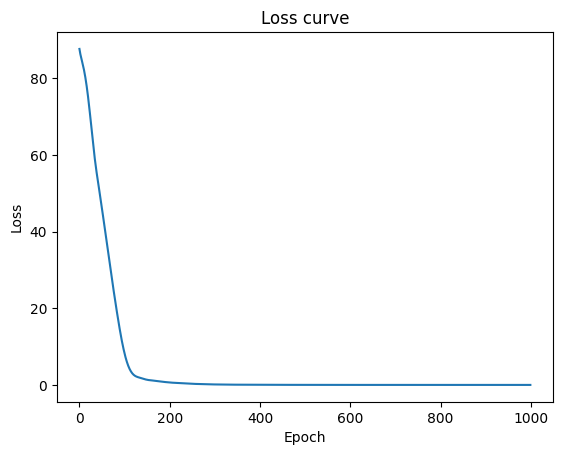

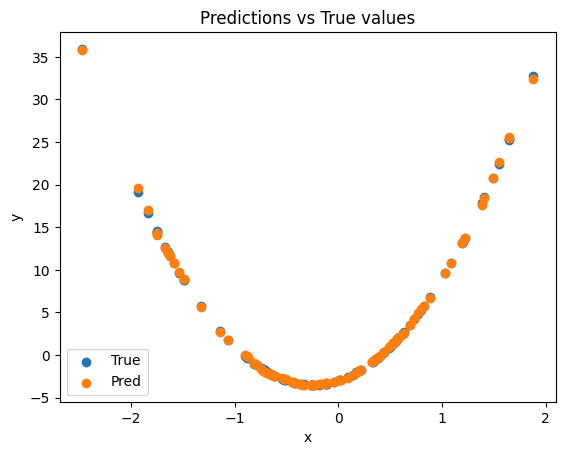

In [1]:
# Import PyTorch and other libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function y = 8x^2 + 4x - 3
def quadratic(x):
  return 8 * x**2 + 4 * x - 3

# Generate some random data points for x and y
x = torch.randn(100, 1) # 100 samples of x
y = quadratic(x) # corresponding y values

# Plot the data points
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic function')
plt.show()

# Define a neural network model with two hidden layers
model = nn.Sequential(
  nn.Linear(1, 10), # input layer
  nn.ReLU(), # activation function
  nn.Linear(10, 10), # hidden layer
  nn.ReLU(), # activation function
  nn.Linear(10, 1) # output layer
)

# Define a loss function and an optimizer
loss_fn = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer

# Train the model for 1000 epochs
epochs = 1000
losses = [] # to store the loss values
for epoch in range(epochs):
  # Forward pass
  y_pred = model(x) # predict y from x
  loss = loss_fn(y_pred, y) # compute the loss
  losses.append(loss.item()) # store the loss value

  # Backward pass and update
  optimizer.zero_grad() # clear the gradients
  loss.backward() # compute the gradients
  optimizer.step() # update the parameters

  # Print the loss every 100 epochs
  if epoch % 100 == 0:
    print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

# Plot the predictions and the true values
plt.scatter(x, y, label='True')
plt.scatter(x, y_pred.detach(), label='Pred')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs True values')
plt.legend()
plt.show()
